## 1. Distribuciones de probabilidad ##

a) Siguiendo el procedimiento visto en clases, derive la expresión que genera números con base en la distribución de Boltzmann con base en la distribución uniforme (5%)

Considere que para $Q(z) = 1$ en el intervalo de $[0,1)$ se tendrá la definición de:


$$ P(E) = \beta e^{- \beta E}, \text{en el intervalo }  [0,1) \text{ con } Q(z) = 1$$

$$\implies P(E) = \gamma e ^{- \gamma E} , \text{en el intervalo} \quad [0,\infty)$$

$$\implies z = \int_0^{E(z)} \gamma e ^{- \gamma E'} \mathrm{d}E' = 1 - e ^{- \gamma E}$$

$$\rightarrow E = \frac{- ln(1-z)}{\gamma}

b) Utilice el módulo numpy.random.uniform para generar 50 000 números aleatorios de una distribución uniforme y utilice la expresión de (a) para generar números de la distribución de Boltzmann. Utilice el valor β = 1.0 (7.5%)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def aleatory_nums(beta, N):
    E = -np.log(1 - np.random.uniform(size = N)) / beta #Se ignora el 
    return E

e = aleatory_nums(1,50000)

c) Utilice el módulo numpy.histogram para generar un histograma de la distribución de los números aleatorios (5%)

In [14]:
hist, bin_edges = np.histogram(e, density=True)

d) Utilice el módulo matplotlib.pyplot.hist para generar un histograma. Explique, los datos se comportan de acuerdo a la distribución esperada? Por qué?(7.5%)

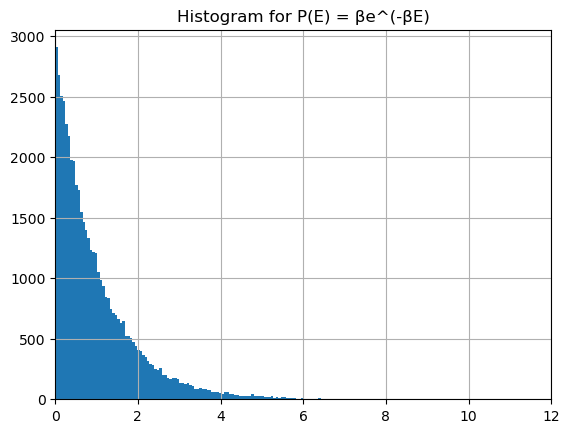

In [19]:
plt.hist(e, bins='auto')  #(Esta línea se puede leer también como matplotlib.pyplot.hist) Se asignan bins automáticos y se hace en términos de densidad
plt.title(r"Histogram for P(E) = βe^(-βE)") 
plt.grid()
plt.xlim(0,12) #Se imponen límites para la mejor apreciación del fenómeno
plt.show()

# Explicación:

La distribución de Boltzmann es una distribución que matemáticamente se escribe como una explonencial inversa, esta se destaca por tener el comportamiento que se puede apreciar en la gráfica. Este se da puesto a que se tienen que generar números dentro de la distribución por lo que esa forma de 'rampa' se da gracias a los posibles valores dados con los parámetros β = 1 y $k_{B}$ = 1

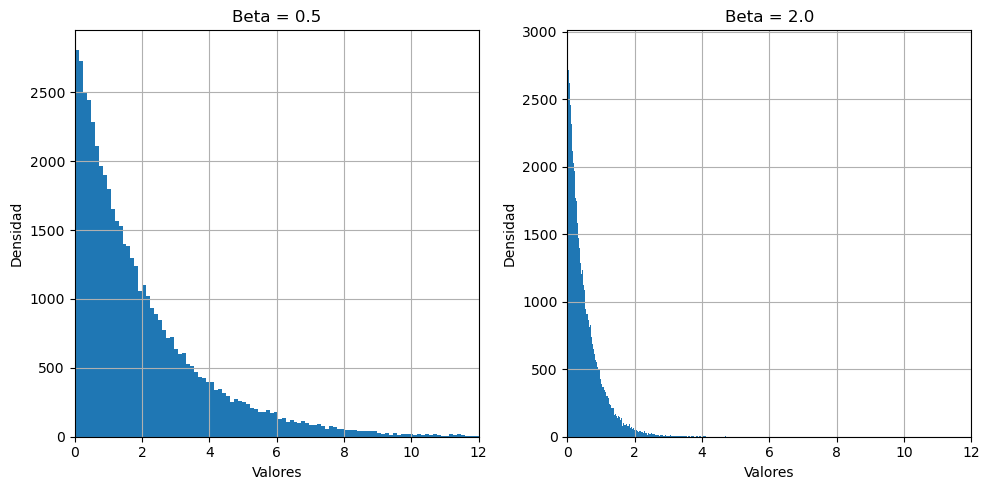

In [16]:
#Valores de beta
beta_values = [0.5, 2.0]

#Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # figsize opcional para ajustar el tamaño

#Iterar sobre los valores de beta y graficar en cada subgráfico
for i, b in enumerate(beta_values):
    a = aleatory_nums(b, 50000)  #Generar datos aleatorios
    axes[i].hist(a, bins='auto')  #Graficar en el subgráfico correspondiente
    axes[i].grid()
    axes[i].set_title(f'Beta = {b}')  #Título para cada subgráfico
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Densidad')
    axes[i].set_xlim(0,12)

# Mostrar la figura
plt.tight_layout()  #Ajustar el espaciado entre subgráficos
plt.show()

# Explicación 

Cuando se varía la temperatura se obtiene una variación en el comportamiento de los valores de forma en la que si el valor de β aumenta la temperatura se vió reducida (esto ya que β = 1/T) y con lo mismo en la gráfica se verá un 'ensanchamiento' de la gráfica que se ve relacionado también con la reducción del factor exponencial y un descenso rápido de la densidad para valores ya cercanos a 4.

Ahora, cuando el β se ve disminuído su densidad por valor aumenta ya que también se apreciará un aumento de temperatura, esto generará un aumento en el tamaño general de la gráfica y estirará la curva de la forma apreciable.

Físicamente
################################################################################################################################################

# 2. Monte Carlo

Utilice el método de Monte Carlo de punto medio para evaluar la integral:

$$ I=\int_0^1 \mathrm{~d} t e^{-t^2} $$

Realice un gráfico del error con respecto a N. Explique, obtiene el comportamiento esperado del error para métodos de Monte Carlo?

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def integrand(t):
    return np.exp(-t**2)

def int_MonteCarlo(integrand,t_inf, t_sup, N):
    I = 0.0
    for i in range(N-1):
        I += ((t_sup - t_inf) / N) * integrand(i)
        return I

print(int_MonteCarlo(integrand, 0, 1, 10000))

0.0001
